In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def weekly_lineplot(series, weeks):
    series['d_semana'] = [d.strftime('%w') for d in series.index]
    series['semana'] = [d.strftime('%U') for d in series.index]
    series['ano'] = [d.strftime('%Y') for d in series.index]
    series['semana_ano'] = series['ano'] + ' - semana ' + series['semana']

    series['semana_ext'] = [d.strftime('%A') for d in series.index]

    series['semana_ano'] = series['ano'] + ' - semana ' + series['semana']
    
    semanas =series['semana_ano'].unique()
    dsemana = series['d_semana'].unique()
    dsemana_ext = series['semana_ext'].unique()
    
    count = 0
    for i, s in enumerate(semanas):

        #checar se é o começo da semana
        if int(series.loc[series.semana_ano==s,:].iloc[0].d_semana) != 0:
            continue

        plt.plot('d_semana','energia', data=series.loc[series.semana_ano==s,:], label=s)
        plt.legend(bbox_to_anchor=(1,1), loc="upper left")
        count = count + 1
        if count == weeks:
            break
    plt.xticks(dsemana, dsemana_ext, rotation='vertical')
    
    plt.show()

In [3]:
def weekly_boxplot(series):
    series['d_semana'] = [d.strftime('%A') for d in series.index]
    b = sns.boxplot(x='d_semana', y='energia', data=series)
    b.set_xticklabels(b.get_xticklabels(),rotation=90)

In [4]:
df = pd.read_csv('2000_2021_Brazilian_Northeast_Region_daily_MW_instantaneous_maximum_demand_series.csv - 2000_2021_Brazilian_Northeast_Region_daily_MW_instantaneous_maximum_demand_series_train.csv', parse_dates=['data'], index_col='data')

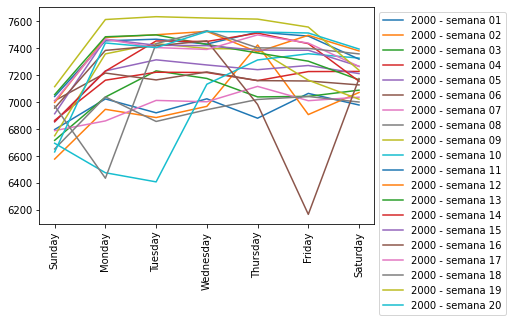

In [5]:
weekly_lineplot(df,20)

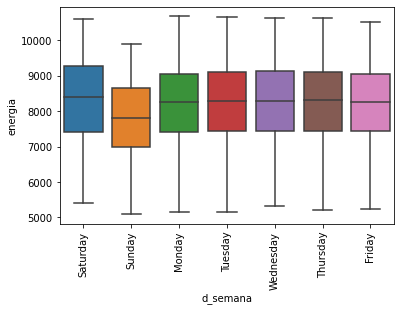

In [6]:
weekly_boxplot(df)